# Warm up - Fitting Light Curves

## Importing Packages and Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from bayesn import SEDmodel

In [2]:
model = SEDmodel(load_model='T21_model')

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /root/partiiiproject
Loading built-in model T21_model


## Generate Fit for the Supernova

In [3]:
filt_map = {'g': 'g_PS1', 'r': 'r_PS1', 'i': 'i_PS1', 'z': 'z_PS1'}
#samples, sn_props = model.fit_from_file(model.example_lc, filt_map=filt_map)
samples, sn_props = model.fit_from_file("Foundation_DR1_SN2017cpu.txt", filt_map=filt_map)

/root/miniforge3/envs/bayesn/lib/python3.11/site-packages/jax/_src/linear_util.py:193: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.04      0.04      0.03      0.00      0.09    187.03      1.01
          Ds[0]     36.70      0.05     36.70     36.61     36.78    240.60      1.01
 eps_tform[0,0]     -0.03      0.94     -0.01     -1.74      1.35    457.76      1.00
 eps_tform[0,1]      0.22      0.85      0.23     -1.07      1.69    616.52      1.00
 eps_tform[0,2]      0.38      0.88      0.37     -0.99      1.88    946.72      1.00
 eps_tform[0,3]     -0.53      0.91     -0.54     -2.12      0.91    653.26      1.00
 eps_tform[0,4]     -0.30      0.74     -0.32     -1.60      0.85    597.81      1.00
 eps_tform[0,5]     -0.05      0.77     -0.06     -1.29      1.20    531.56      1.01
 eps_tform[0,6]      0.37      0.70      0.40     -0.71      1.54    495.82      1.00
 eps_tform[0,7]      0.66      0.71      0.65     -0.59      1.74    811.51      1.00
 eps_tform[0,8]     -0.48      0.80     -0.52     -1.

## Plotting Fits

In [4]:
#meta, lcdata = sncosmo.read_snana_ascii(model.example_lc, default_tablename='OBS')
meta, lcdata = sncosmo.read_snana_ascii(open("Foundation_DR1_SN2017cpu.txt", "r"), default_tablename='OBS')
lcdata = lcdata['OBS'].to_pandas()

In [5]:
t = np.arange(-10, 40, 1)
bands = ['g_PS1', 'r_PS1', 'i_PS1', 'z_PS1']
z, ebv_mw = sn_props

flux_grid = model.get_flux_from_chains(t, bands, samples, z, ebv_mw, mag=False, num_samples=10)

Getting best fit light curves from chains...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.32s/it]


In [6]:
fit, fit_err = flux_grid.mean(axis=(0, 1)), flux_grid.std(axis=(0, 1))

Now for the actual plot

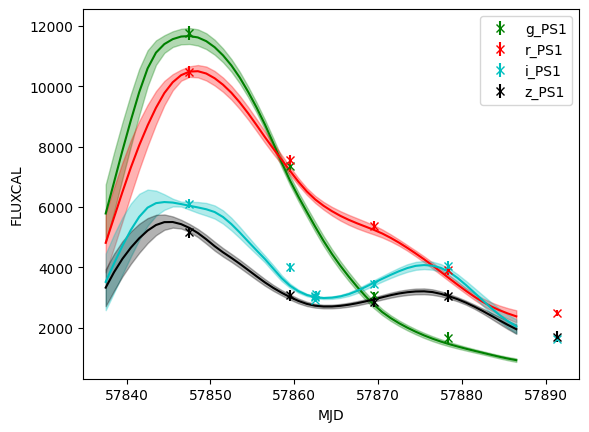

In [7]:
cs = ['g', 'r', 'c', 'k']
plot_t = t + meta['SEARCH_PEAKMJD']

for b_ind, b in enumerate(bands):
    b_data = lcdata[lcdata.FLT == b[0]]
    plt.errorbar(b_data.MJD, b_data.FLUXCAL, b_data.FLUXCALERR, fmt=f'{cs[b_ind]}x', label=b)
    plt.plot(plot_t, fit[b_ind, :], color=cs[b_ind])
    plt.fill_between(plot_t, fit[b_ind, :] - fit_err[b_ind, :], fit[b_ind, :] + fit_err[b_ind, :], alpha=0.3, color=cs[b_ind])
plt.xlabel('MJD')
plt.ylabel('FLUXCAL')
plt.legend()
plt.show()

## A bit of Analysis

In [8]:
samples.keys()

dict_keys(['AV', 'Ds', 'eps', 'eps_tform', 'theta', 'tmax', 'peak_MJD', 'mu', 'delM'])

In [9]:
samples['AV'].shape

(4, 250, 1)

(array([336., 224., 154., 108.,  67.,  52.,  23.,  20.,  12.,   4.]),
 array([5.69027015e-05, 1.82038410e-02, 3.63507793e-02, 5.44977176e-02,
        7.26446559e-02, 9.07915942e-02, 1.08938532e-01, 1.27085471e-01,
        1.45232409e-01, 1.63379347e-01, 1.81526286e-01]),
 <BarContainer object of 10 artists>)

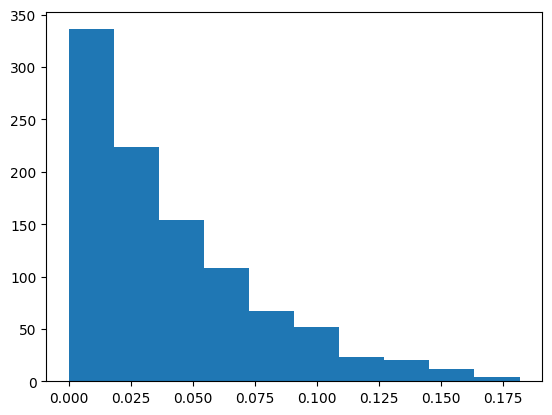

In [10]:
plt.hist(samples['AV'].flatten())

In [11]:
np.mean(samples['AV'])

Array(0.04099003, dtype=float64)

In [12]:
np.std(samples['AV'])

Array(0.03605911, dtype=float64)

In [13]:
np.mean(samples['theta'])

Array(-0.86640576, dtype=float64)

In [14]:
np.std(samples['theta'])

Array(0.2424419, dtype=float64)